# Import des Librairies

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


# **Data Loading**

In [38]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# **Normalization et Encoding**

In [39]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [40]:
# CIFAR-10 dataset has 10 classes
num_classes = 10

# Building a simple neural network model
model_simple = Sequential()
model_simple.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the 32x32x3 input images
model_simple.add(Dense(512, activation='relu'))     # First dense layer with 512 neurons
model_simple.add(Dense(256, activation='relu'))     # Second dense layer with 256 neurons
model_simple.add(Dense(num_classes, activation='softmax'))  # Output layer with 10 neurons for 10 classes

# Compiling the model
model_simple.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Displaying the model summary
model_simple.summary()
history_simple = model_simple.fit(X_train, Y_train_en, epochs = 5, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1573376   
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.8582 - accuracy: 0.3295 - val_loss: 1.7268 - val_accuracy: 0.3730
Epo

###### On utilisant un simple modèle de neural network on remarque une faible accuracy de 45%

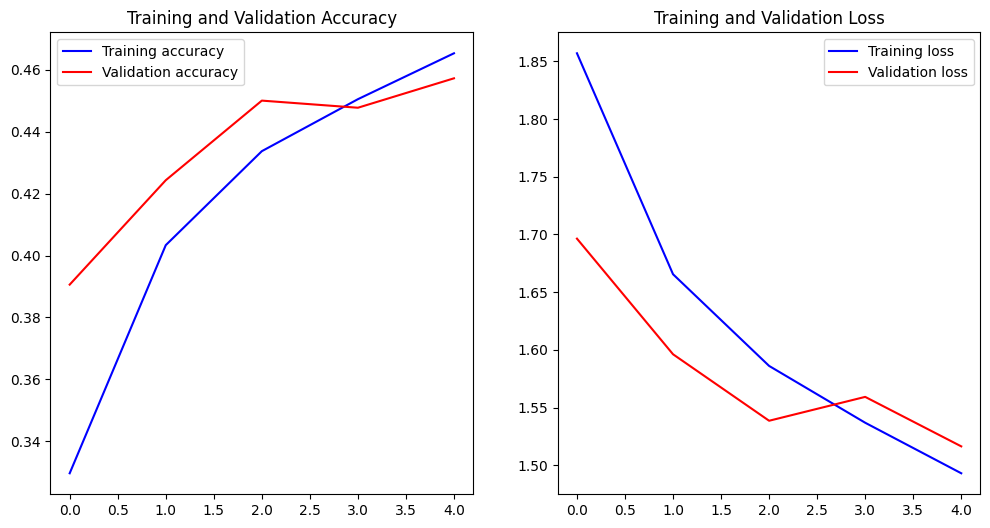

In [41]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Creation du premier modèle CNN

In [42]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [43]:
model.summary()
history_1 = model.fit(X_train, Y_train_en, epochs = 10, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_19 (Dense)            (None, 128)              

### Comparaison entre l'accuracy et Loss entre Training et Validation

In [44]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


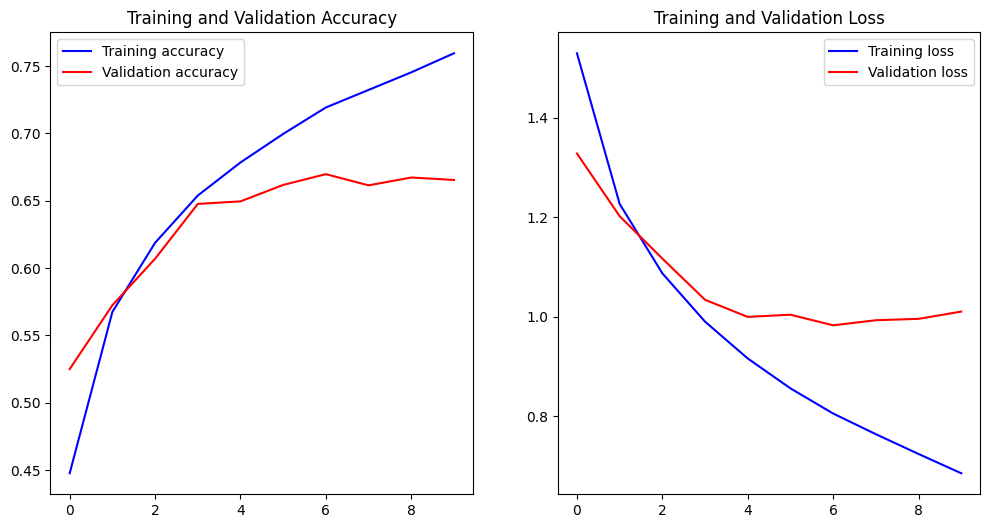

In [52]:
import matplotlib.pyplot as plt

accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(len(accuracy))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Matrice de Confusion

313/313 [==============================] - 4s 13ms/step


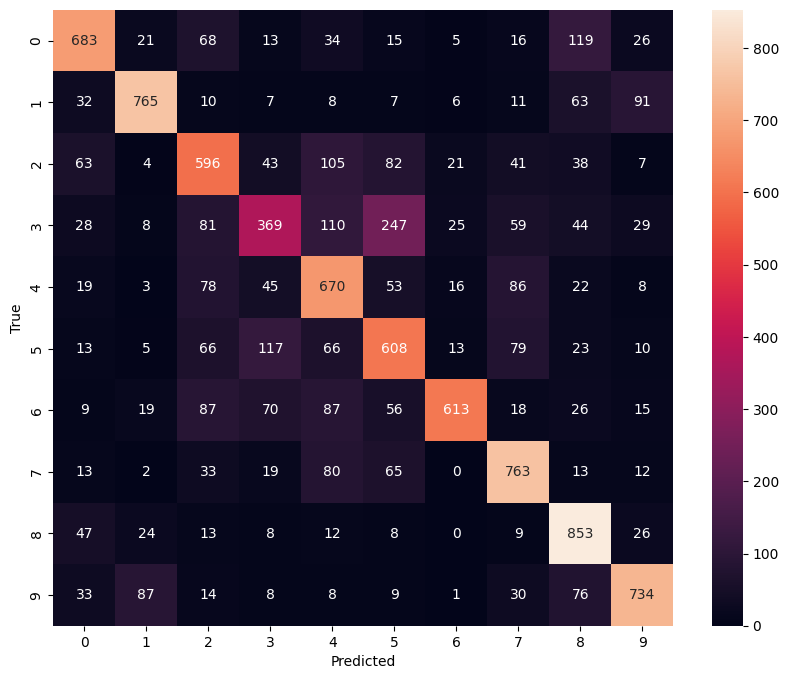

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test_en, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Exemple de comparaison entre la categorie reelle et la categorie predie de certaines images

1/1 [==============================] - 0s 22ms/step


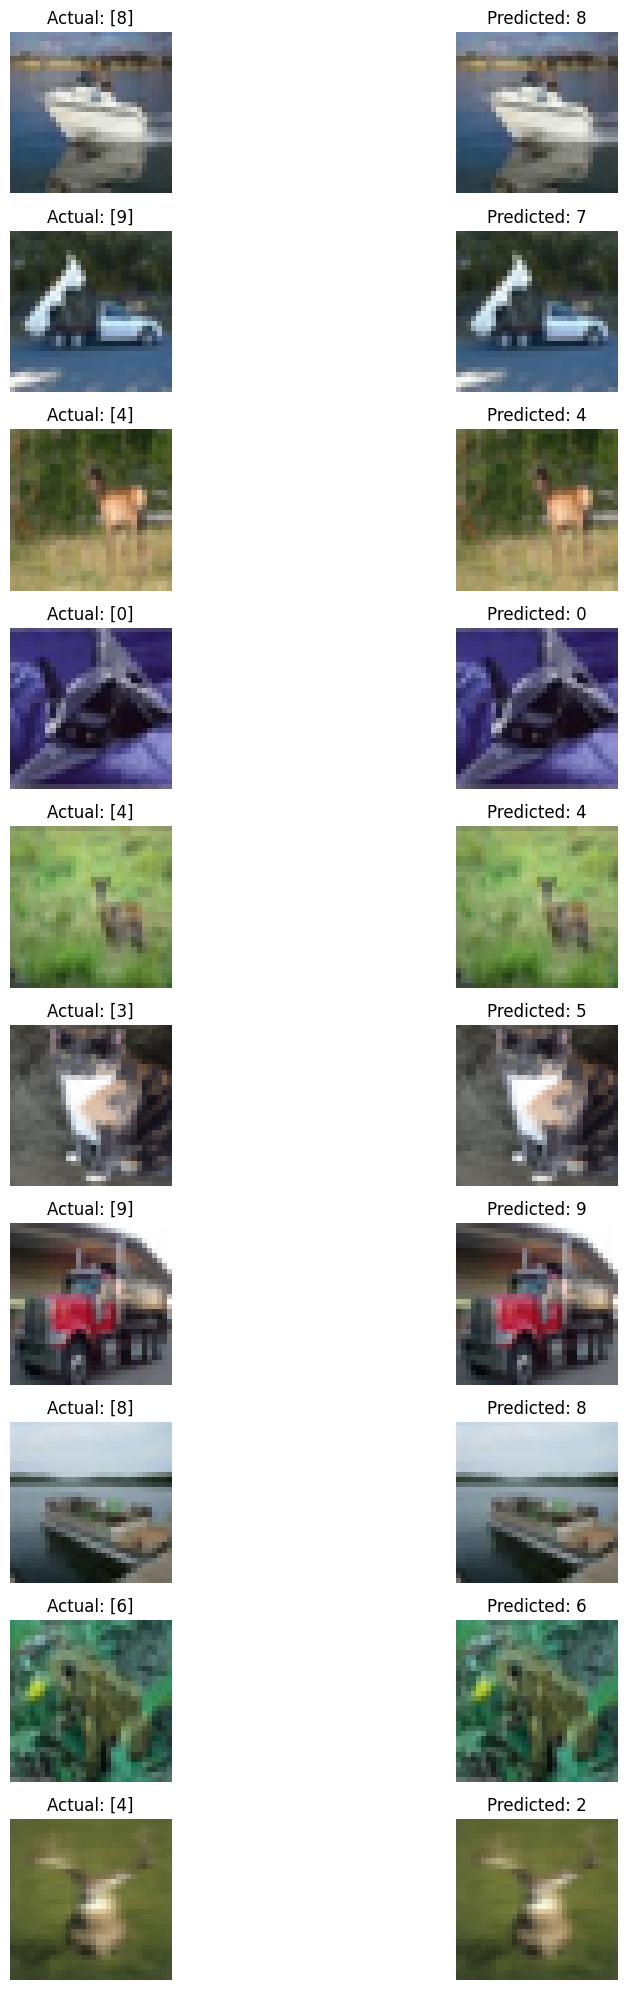

In [54]:
def display_sample_predictions(model, test_images, test_labels, num_samples=10):
    indices = np.random.choice(range(len(test_images)), num_samples)
    sample_images = test_images[indices]
    sample_labels = test_labels[indices]
    predictions = model.predict(sample_images)

    plt.figure(figsize=(12, 2 * num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(sample_images[i])
        plt.title("Actual: " + str(sample_labels[i]))
        plt.axis('off')

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(sample_images[i])
        plt.title("Predicted: " + str(np.argmax(predictions[i])))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_predictions(model, X_test, Y_test)


### Activation maps of differentes couches de CNN

1/1 [==============================] - 0s 83ms/step


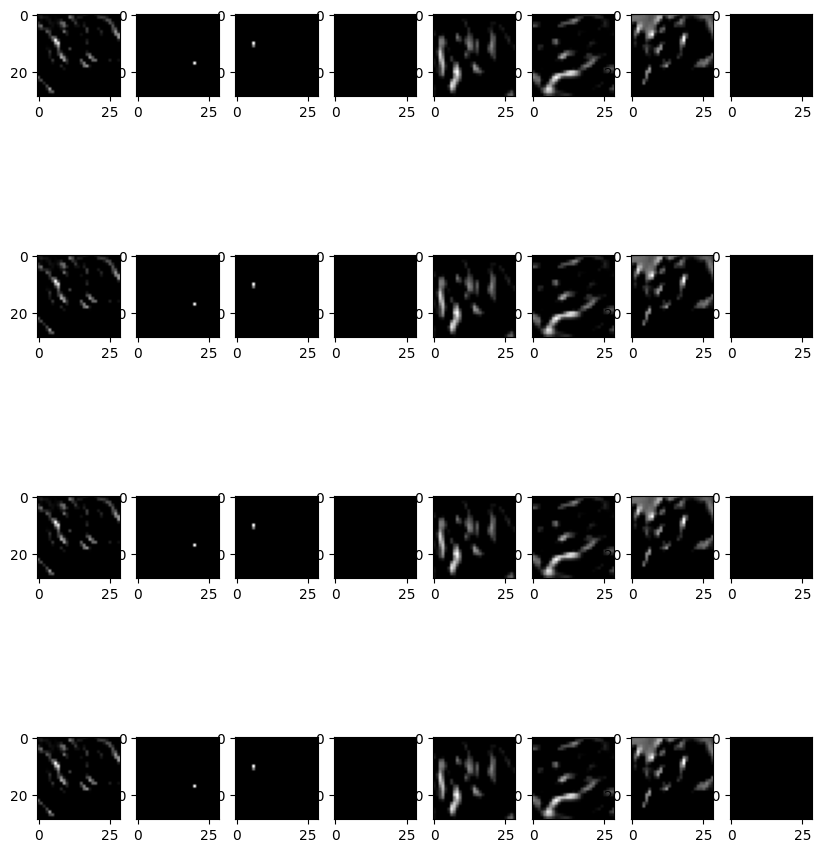

In [55]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
test_image = X_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(test_image)

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
    for row in range(row_size):
        for col in range(col_size):
            ax[row][col].imshow(activation[0, :, :, col], cmap='gray')
    plt.show()

display_activation(activations, 8, 4, 0)


### T-Sne

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.082147
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.322708
[t-SNE] KL divergence after 300 iterations: 1.531968


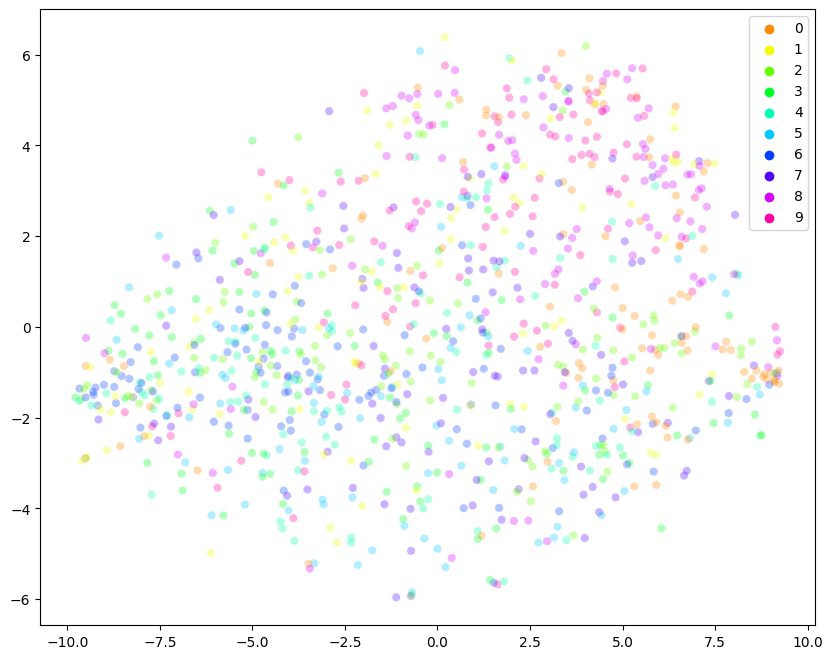

In [56]:
from sklearn.manifold import TSNE

X_test_flat = X_test.reshape(X_test.shape[0], -1)[:1000]
Y_test_flat = Y_test[:1000]

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(10,8))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=Y_test_flat.ravel(),
    palette=sns.color_palette("hsv", 10),
    legend="full",
    alpha=0.3
)
plt.show()


# 2ème Version de CNN Ameliorer en ajoutant plus de filtres

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Building an enhanced CNN model with regularization and batch normalization
model_cnn = Sequential()

# First convolutional layer
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))

# Second convolutional layer
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.3))

# Third convolutional layer
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.4))

# Flatten the output of the convolutional layers
model_cnn.add(Flatten())

# Adding dense layers
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))  # Assuming 10 classes for CIFAR-10

# Compiling the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)      

In [60]:
history_2 = model_cnn.fit(X_train, Y_train_en, epochs = 5, verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8086 - accuracy: 0.3362 - val_loss: 1.6397 - val_accuracy: 0.4085
Epoch 2/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5041 - accuracy: 0.4563 - val_loss: 1.4365 - val_accuracy: 0.4663
Epoch 3/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3500 - accuracy: 0.5164 - val_loss: 1.3269 - val_accuracy: 0.5425
Epoch 4/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.2626 - accuracy: 0.5559 - val_loss: 1.1008 - val_accuracy: 0.6084
Epoch 5/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.1906 - accuracy: 0.5778 - val_loss: 0.9533 - val_accuracy: 0.6606


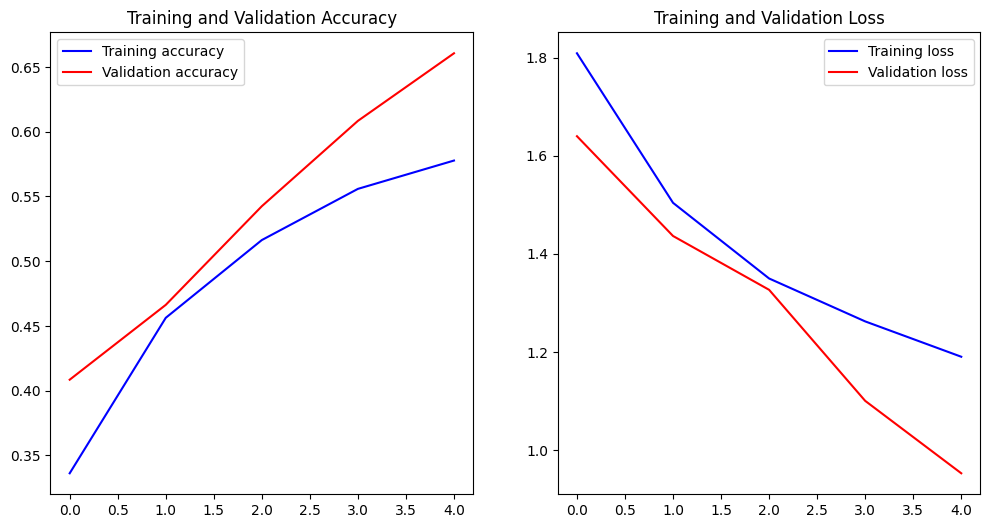

In [61]:
import matplotlib.pyplot as plt

accuracy = history_2.history['accuracy']
val_accuracy = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(len(accuracy))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

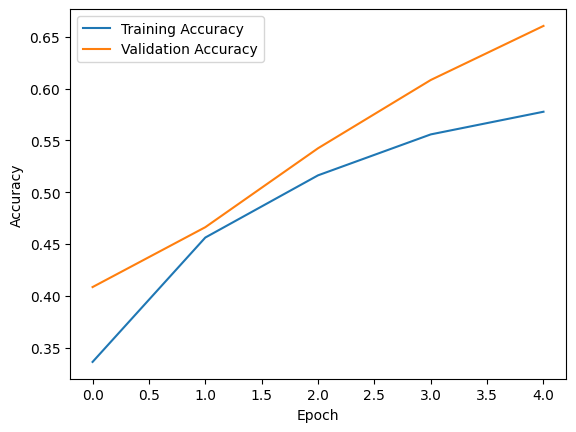

In [62]:
# Plot training history
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### Avec un nombre faible d'empoches on obtient une accuracy similaire au modèle precedent qui a le double dans le nombre d'empoches d'ou l'efficacite des filtres ajoutes